# Tahap Preprocessing

Preprocessing dilakukan dengan beberapa tahap, diantaranya yang digunakan adalah:


1.   Menghapus URL jika ditemukan
2.   Menghapus tanda baca
3.   Menghapus Stopwords (Bahasa Inggris)
4.   Case Folding menjadi huruf kecil
5.   Tokenization
6.   Membuat Dictionary Word Index
7.   Text to sequence
8.   Padding text



## Library

In [ ]:
import pandas as pd
import numpy as np
import math as m

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Class

### DatasetProcessing

In [ ]:
from sklearn.model_selection import train_test_split

class DatasetProcessing:

    def loadDataset(self, path):
        #Load dataset dari path yang ditentukan
        dataset = pd.read_csv(path)
        return dataset

    def applyLabel(self, dataset, label):
        #Menambahkan label untuk berita yang tidak memiliki label sebelumnya
        if label == 1:
            dataset['label'] = 1
        else:
            dataset['label'] = 0

        return dataset  

    def concatDataset(self, dataset, datasetToConcat):
        #Penggabungan 2 dataframe menjadi 1 dataframe menggunakan .concat, parameter = 2 dataframe
        concatenatedDataset = pd.concat([dataset, datasetToConcat]).reset_index(drop = True)

        return concatenatedDataset

    def getNewsLength(self, dataset):
        #Mengambil panjang kata setiap teks berita pada dataframe
        sizes = []

        for text in dataset['text']:
            text = str(text)
            len_ = len(text.split())
            sizes.append(len_)

        news_length = np.array(sizes)

        return news_length
    
    def removeDuplicate(self, dataset):
        news_count = len(dataset)
        print("Jumlah data keseluruhan  : ", news_count)

        duplicated = dataset[dataset.duplicated(['title', 'text', 'label'])]
        duplicated_news_count = len(duplicated)
        print("Jumlah data yang terduplikasi  : ", duplicated_news_count)

        dataset = dataset.drop_duplicates(['title', 'text', 'label'], keep='first')
        updated_news_count = len(dataset)
        print("Jumlah data setelah dihapus yang terduplikasi  : ", updated_news_count)

        return dataset

    def removeNull(self, dataset):
        news_count = len(dataset)
        print("Jumlah data keseluruhan  : ", news_count)

        updated_dataset = dataset.dropna(subset=['title', 'text', 'label'])
        updated_news_count = len(updated_dataset)
        news_count = news_count - updated_news_count
        print("Jumlah data yang memiliki null values  : ", news_count)
        print("Jumlah data setelah dihapus jika memiliki null values  : ", updated_news_count)

        return updated_dataset

    def mergeNews(self, dataset):
        dataset = dataset.reset_index(drop = True)
        x = dataset['title'] + ' ' + dataset['text']
        y = dataset['label']

        return x, y

    def shuffleData(self, x, y):
        np.random.seed(42)

        x_data = np.array(x)
        y_data = y

        indices = np.arange(x_data.shape[0])
        np.random.shuffle(indices)
        x_data = x_data[indices]
        y_data = y_data[indices]

        return x_data, y_data

    def splitData(self, x, y, val, test):
        x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=val,random_state=42)
        x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=test,random_state=42)

        print("Summary data splitting: ")
        print("X_train  : ", x_train.shape)
        print("y_train  : ", y_train.shape)
        print("X_Val    : ", x_val.shape)
        print("y_train  : ", y_val.shape)
        print("X_test   : ", x_test.shape)
        print("y_test   : ", y_test.shape)

        return x_train, y_train, x_val, y_val, x_test, y_test

    def renameColumn(self, df, name, new_name):
        df = df.rename(columns={name: new_name})

        return df

### DatasetAnalysis

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

class DatasetAnalysis:

    def infoDataset(self, dataset):
        print("Dataset Information : ")
        dataset.info()

    def plotFrequency(self, dataset, len_limit=0):

        if len_limit != 0:
            dataset = dataset[dataset.len < len_limit]
        
        plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})
        news_length = dataset['len']
        x = np.array(news_length)
        plt.hist(x, bins=50)
        plt.gca().set(title='Persebaran Jumlah Kata pada Berita', xlabel='Jumlah Kata', ylabel='Banyaknya Berita')

    def dataCount(self, dataset):
        count_fake = len(dataset[dataset['label'] == 1])
        count_true = len(dataset[dataset['label'] == 0])
        print("Total data pada berita Fake: ", count_fake)
        print("Total data pada berita Real: ", count_true)
        labels = ["Fake","True"]
        sizes = [count_fake, count_true]
        colors = ['lightcoral', 'lightskyblue']
        plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%', labels=labels, radius = 4)
        
        plt.axis('equal')
        plt.show()

### PickleManager

In [ ]:
import pickle

class PickleManager:
    def pickleSave(self, path, variable):
        new_path = path
        with open(new_path, 'wb') as f:
            pickle.dump(variable, f)
        f.close()
        print("Saved to path : ", new_path)

    def pickleLoad(self, path):
        new_path = path
        load_file = open(new_path, 'rb')
        loaded_file = pickle.load(load_file)

        return loaded_file

### TextCleaning

In [ ]:
# Preprocessing
class TextCleaning():

    def removeUrl(self, text):
        #Penjelasan: Buang teks yang memiliki URL
        text_result = text.split(" ")
        text_result = ' '.join(
            [i 
            for i in text_result
              if 'http://' not in i
            ])
        return text_result

    def removeLineBreak(self, text):
        #Penjelasan: menghapus pemisah kalimat '\n' atau newline
        line_break = '\n'
        text_result = ""
        for character in text:
          if character not in line_break:
            text_result = text_result + character

        
        return text_result

    def removePunctuation(self, text):
        #Penjelasan: Buang teks yang memiliki tanda baca
        punctuations = ['','!','(',')','-','[',']','{','}',';',':',"'",'"','`','/','<'
        ,'>','.','?','@','#','$','%','&','*','_','~','’','”','“', ',', '']

        text_result = ""
        for character in text:
          if character not in punctuations:
            text_result = text_result + character

        return text_result

    def textLower(self, text):
        #Penjelasan: mengubah huruf teks menjadi huruf kecil semua
        text_result = text.lower()
        return text_result

    def removeStopwords(self, text):
        #Penjelasan: Membuang kata-kata yang tidak memiliki makna dari sebuah kalimat     
        stopwords_list = ['i','me','my','myself','we','our','ours','ourselves','you',
                          "you're","you've","you'll","you'd",'your','yours','yourself'
                          ,'yourselves','he','him','his','himself','she',"she's",'her'
                          ,'hers','herself','it',"it's",'its','itself','they','them',
                          'their','theirs','themselves','what','which','who','whom',
                          'this','that',"that'll",'these','those','am','is','are',
                          'was','were','be','been','being','have','has','had',
                          'having','do','does','did','doing','a','an','the','and',
                          'but','if','or','because','as','until','while','of','at',
                          'by','for','with','about','against','between','into',
                          'through','during','before','after','above','below','to',
                          'from','up','down','in','out','on','off','over','under',
                          'again','further','then','once','here','there','when',
                          'where','why','how','all','any','both','each','few','more',
                          'most','other','some','such','no','nor','not','only','own',
                          'same','so','than','too','very','s','t','can','will','just',
                          'don',"don't",'should',"should've",'now','d','ll','m','o',
                          're','ve','y','ain','aren',"aren't",'couldn',"couldn't",
                          'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',
                          "hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',
                          "mightn't",'mustn',"mustn't",'needn',"needn't",'shan',
                          "shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',
                          "weren't",'won',"won't",'wouldn',"wouldn't"]

        text_result = ""
        text = text.split()

        for word in text:
          if word not in stopwords_list:
            text_result = text_result + " " + word
        
            
        return text_result
        
    def doClean(self, text):
        result = self.removeUrl(text)
        result = self.removeLineBreak(result)
        result = self.removePunctuation(result)
        result = self.textLower(result)
        result = self.removeStopwords(result)

        return str(result.strip()).replace(" ", " ")

    def main(self, x):
        cleaned_text = []
        for line in x: 

            cleaned_text.append(self.doClean(str(line)))
        
        return cleaned_text

    def newsLimiter(self, text, y, limit):
        updated_cleaned_text = []
        updated_y = []

        for i in range(len(text)):
            news_length = len(text[i].split())
            if news_length > limit:
                updated_cleaned_text.append(text[i])
                updated_y.append(y[i])

        return updated_cleaned_text, updated_y

### TextPreprocessing

In [ ]:
class TextPreprocessing:
    def __init__(self, word_index={}):
        self.word_index = word_index

    def doTokenize(self, text):
        word_token = []

        for i in text:
            temp = i.split(" ")
            word_token = word_token + temp

        return word_token

    def findUniqueWord(self, list_word):

        def takeSecond(elem):
            return elem[1]

        unique_word = {}
        for word in list_word:
            if word in unique_word:
                unique_word[word] +=1
            else:
                unique_word[word] = 1

        data = list(unique_word.items())
        data.sort(key=takeSecond, reverse=True)
        word_counted = np.array(data)
        

        return word_counted

    def wordIndexing(self, word):
        index=1
        word_index = {}

        for i in range(len(word)):
            word_index[word[i][0]] = index
            index = index + 1

        return word_index

    def textToSequences(self, text):
        sequenced_text = []
        for i in range(len(text)):
            temp = text[i].split()
            indexed_sentences = []
            for word in temp:
                if word in self.word_index:
                    indexed_sentences.append(self.word_index[word])
            sequenced_text.append(indexed_sentences)

        return sequenced_text

    def doPrePadded(self, sequenced_text, maxlen=300):
        padded_sequences = []
        for news in sequenced_text:
            news_to_check = news
            news_length = len(news)
            if news_length < maxlen:
                zeros = [0]*(maxlen-news_length)
                padded_news = zeros + news
            else:
                padded_news = news[:maxlen]
            padded_sequences.append(padded_news)

        return self.padded_sequences

    def main(self, text):
        #Kata yang tertoken tapi tidak unik
        word_token = self.doTokenize(text)

        #Token yang unik dengan jumlah
        word_counted = self.findUniqueWord(word_token)    

        #Token dijadikan index dictionary
        self.word_index = self.wordIndexing(word_counted)

        #Text berita diubah ke sequence based by word index
        sequenced_text = self.textToSequences(text)

        result_padded = self.doPrePadded(sequenced_text)

        return self.word_index, sequenced_text, word_counted, result_padded


### Embedding

In [ ]:
class Embedding:
    def __init__(self, word_index):
        self.embedding_matrix = []
        self.word_index = word_index

    def getGlove(self, dim):
        EMBEDDING_DIM = dim
        GLOVE_DIR = 'drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.'+str(EMBEDDING_DIM)+'d.txt'

        embeddings_index = {}
        f = open(GLOVE_DIR, encoding='utf8')
        print('Loading Glove from:', GLOVE_DIR,'…', end='')
        for line in f:
            values = line.split()
            word = values[0]
            embeddings_index[word] = np.asarray(values[1:], dtype='float32')
        f.close()
        print('Done.\n Proceeding with Embedding Matrix…', end='')
                                                
        self.embedding_matrix = np.zeros((len(self.word_index) + 1, EMBEDDING_DIM))
        missing_embedding = 0
                                                
        for word, i in self.word_index.items():
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                self.embedding_matrix[i] = embedding_vector
            else:
                missing_embedding += 1

        print("Missing Embedding from Glove: ", missing_embedding)
        return self.embedding_matrix

## Import Dataset

In [ ]:
df_dataset = "drive/MyDrive/Tugas Akhir/Program/Dataset/data.csv"

## DatasetProcessing

In [ ]:
process_dataset = DatasetProcessing()

In [ ]:
df = process_dataset.loadDataset(df_dataset)

In [ ]:
df = process_dataset.renameColumn(df, 'Headline', 'title')
df = process_dataset.renameColumn(df, 'Body', 'text')
df = process_dataset.renameColumn(df, 'Label', 'label')

In [ ]:
df_dataset = df

In [ ]:
df_dataset['len'] = process_dataset.getNewsLength(df_dataset)

## Analisa Dataset

In [ ]:
analyze_dataset = DatasetAnalysis()

### Informasi Dataset

In [ ]:
analyze_dataset.infoDataset(df_dataset)

Dataset Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URLs    4009 non-null   object
 1   title   4009 non-null   object
 2   text    3988 non-null   object
 3   label   4009 non-null   int64 
 4   len     4009 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 156.7+ KB


### Preview Dataset

In [ ]:
df_dataset.head()

URLs  ...   len
0  http://www.bbc.com/news/world-us-canada-414191...  ...  1061
1  https://www.reuters.com/article/us-filmfestiva...  ...   551
2  https://www.nytimes.com/2017/10/09/us/politics...  ...  1086
3  https://www.reuters.com/article/us-mexico-oil-...  ...    97
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...  ...    37

[5 rows x 5 columns]

In [ ]:
df_dataset.tail()

URLs  ...  len
4004  http://beforeitsnews.com/sports/2017/09/trends...  ...  326
4005  http://beforeitsnews.com/u-s-politics/2017/10/...  ...   57
4006  https://www.activistpost.com/2017/09/ron-paul-...  ...    1
4007  https://www.reuters.com/article/us-china-pharm...  ...  316
4008  http://beforeitsnews.com/u-s-politics/2017/10/...  ...  588

[5 rows x 5 columns]

In [ ]:
df_dataset

URLs  ...   len
0     http://www.bbc.com/news/world-us-canada-414191...  ...  1061
1     https://www.reuters.com/article/us-filmfestiva...  ...   551
2     https://www.nytimes.com/2017/10/09/us/politics...  ...  1086
3     https://www.reuters.com/article/us-mexico-oil-...  ...    97
4     http://www.cnn.com/videos/cnnmoney/2017/10/08/...  ...    37
...                                                 ...  ...   ...
4004  http://beforeitsnews.com/sports/2017/09/trends...  ...   326
4005  http://beforeitsnews.com/u-s-politics/2017/10/...  ...    57
4006  https://www.activistpost.com/2017/09/ron-paul-...  ...     1
4007  https://www.reuters.com/article/us-china-pharm...  ...   316
4008  http://beforeitsnews.com/u-s-politics/2017/10/...  ...   588

[4009 rows x 5 columns]

### Persebaran Dataset

In [ ]:
news_to_analyze = df_dataset

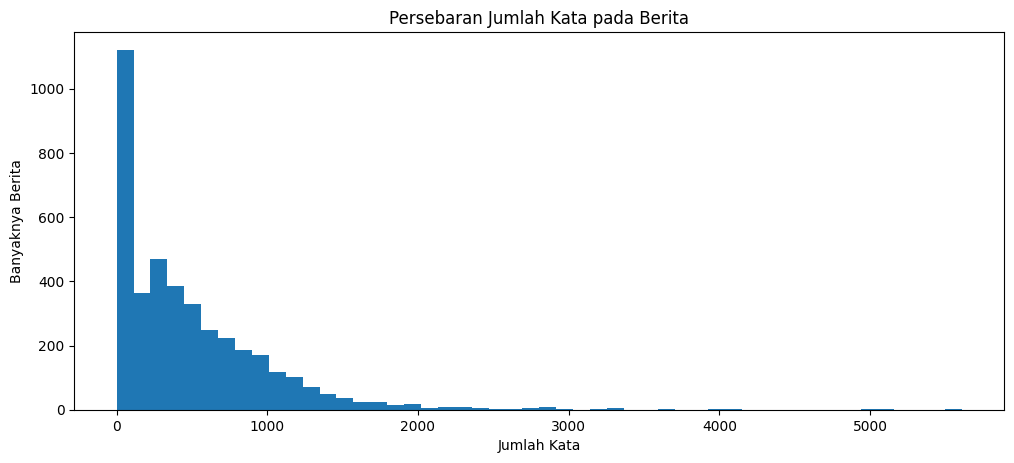

In [ ]:
analyze_dataset.plotFrequency(news_to_analyze)

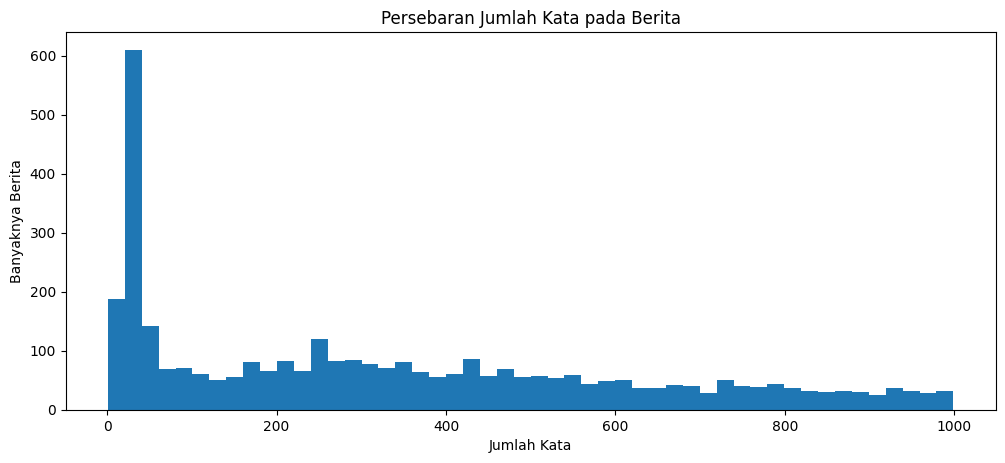

In [ ]:
analyze_dataset.plotFrequency(news_to_analyze, 1000)

In [ ]:
news_to_process = news_to_analyze

#### Hapus data yang duplikat

In [ ]:
#Hapus data yang duplikat
print("Jumlah data keseluruhan: ", len(news_to_process))

Jumlah data keseluruhan:  4009


In [ ]:
dataset_temp = process_dataset.removeDuplicate(news_to_process)

Jumlah data keseluruhan  :  4009
Jumlah data yang terduplikasi  :  466
Jumlah data setelah dihapus yang terduplikasi  :  3543


In [ ]:
dataset_temp = process_dataset.removeNull(dataset_temp)

Jumlah data keseluruhan  :  3543
Jumlah data yang memiliki null values  :  21
Jumlah data setelah dihapus jika memiliki null values  :  3522


#### Persebaran Data

Total data pada berita Fake:  1719
Total data pada berita Real:  1803


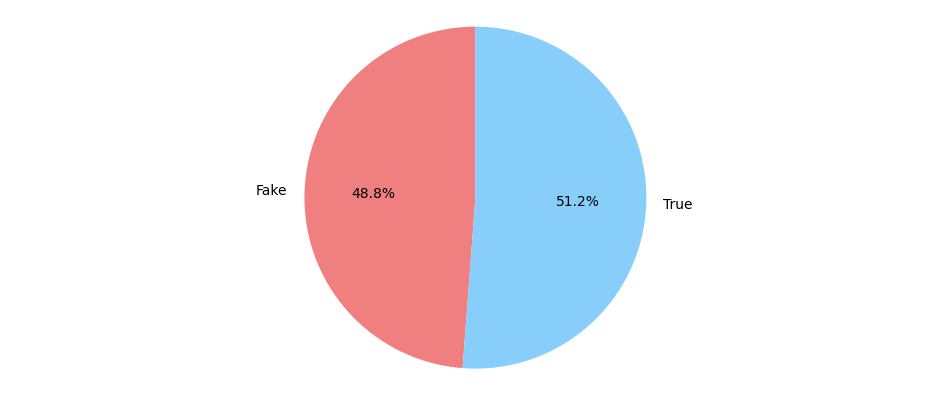

In [ ]:
analyze_dataset.dataCount(dataset_temp)

### Contoh untuk Teks Uji

In [ ]:
x_uji, y_uji = process_dataset.mergeNews(dataset_temp)

In [ ]:
y_uji = np.array(y_uji)
new_x, new_y = process_dataset.shuffleData(x_uji, y_uji)
x_train_uji, y_train_uji, x_val_uji, y_val_uj, x_test_uji, y_test_uji = process_dataset.splitData(new_x, new_y, 0.2, 0.25)

Summary data splitting: 
X_train  :  (2112,)
y_train  :  (2112,)
X_Val    :  (705,)
y_train  :  (705,)
X_test   :  (705,)
y_test   :  (705,)


In [ ]:
x_test_uji[0]

"Baby dies in hot car while mother gets hair done A Georgia woman is being charged in connection to the death of her 1-year-old daughter who died in a hot car last month while the woman was having her hair done, the Atlanta Journal-Constitution reported.\n \nDijanelle Fowler, 25, was charged with second degree murder, child cruelty and concealing. Officials do not believe that Fowler intentionally harmed her daughter, Skylar Fowler.\n \nFowler told police that she left the air conditioning running in the car, but at some point the engine shut off.\n \nThe Journal-Constitution reported that security footage assisted law enforcement in the case against Fowler.\n \nThe warrant says that Fowler left her car at 10:06 a.m., and did not return to her car until 4 p.m, staying in the salon the entire time. She then was unable to start her car, and asked a good Samaritan at the hair salon for assistance.\n \nPolice believe that Fowler covered the child up while the citizen assisted her in restar

In [ ]:
y_test_uji[0]

0

### Menggabungkan Title dan Text berita
Referensi: https://www.sciencedirect.com/science/article/pii/S1877050920300806

In [ ]:
x, y = process_dataset.mergeNews(dataset_temp)

## Preprocessing

### Text Cleaning

In [ ]:
text_cleaning = TextCleaning()

In [ ]:
cleaned_text = text_cleaning.main(x)

#### Preview

##### Before

In [ ]:
x[0]

'Four ways Bob Corker skewered Donald Trump Image copyright Getty Images\nOn Sunday morning, Donald Trump went off on a Twitter tirade against a member of his own party.\nThis, in itself, isn\'t exactly huge news. It\'s far from the first time the president has turned his rhetorical cannons on his own ranks.\nThis time, however, his attacks were particularly biting and personal. He essentially called Tennessee Senator Bob Corker, the chair of the powerful Senate Foreign Relations Committee, a coward for not running for re-election.\nHe said Mr Corker "begged" for the president\'s endorsement, which he refused to give. He wrongly claimed that Mr Corker\'s support of the Iranian nuclear agreement was his only political accomplishment.\nUnlike some of his colleagues, Mr Corker - free from having to worry about his immediate political future - didn\'t hold his tongue.\nSkip Twitter post by @SenBobCorker It\'s a shame the White House has become an adult day care center. Someone obviously mi

##### After

In [ ]:
cleaned_text[0]

'four ways bob corker skewered donald trump image copyright getty imageson sunday morning donald trump went twitter tirade member partythis isnt exactly huge news far first time president turned rhetorical cannons ranksthis time however attacks particularly biting personal essentially called tennessee senator bob corker chair powerful senate foreign relations committee coward running reelectionhe said mr corker begged presidents endorsement refused give wrongly claimed mr corkers support iranian nuclear agreement political accomplishmentunlike colleagues mr corker free worry immediate political future didnt hold tongueskip twitter post senbobcorker shame white house become adult day care center someone obviously missed shift morning — senator bob corker senbobcorker october 8 2017 reportthat wasnt end though spoke new york times really let president four choice quotes tennessee senators interview times particularly damningi dont know president tweets things true know everyone knows doe

Text Limiter untuk Pengujian panjang berita

In [ ]:
cleaned_text_25, y_25 = text_cleaning.newsLimiter(cleaned_text, y, 25)

In [ ]:
print("Jumlah berita: ", len(cleaned_text_25), "Jumlah label: ", len(y_25))

Jumlah berita:  2987 Jumlah label:  2987


In [ ]:
cleaned_text_50, y_50 = text_cleaning.newsLimiter(cleaned_text, y, 50)

In [ ]:
print("Jumlah berita: ", len(cleaned_text_50), "Jumlah label: ", len(y_50))

Jumlah berita:  2601 Jumlah label:  2601


In [ ]:
cleaned_text_100, y_100 = text_cleaning.newsLimiter(cleaned_text, y, 100)

In [ ]:
print("Jumlah berita: ", len(cleaned_text_100), "Jumlah label: ", len(y_100))

Jumlah berita:  2415 Jumlah label:  2415


### Data Shuffling and Splitting

Panjang Berita limit = 0

In [ ]:
y = np.array(y)
new_x, new_y = process_dataset.shuffleData(cleaned_text, y)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x, new_y, 0.2, 0.25)

Summary data splitting: 
X_train  :  (2112,)
y_train  :  (2112,)
X_Val    :  (705,)
y_train  :  (705,)
X_test   :  (705,)
y_test   :  (705,)


In [ ]:
x_test[0]

'baby dies hot car mother gets hair done georgia woman charged connection death 1yearold daughter died hot car last month woman hair done atlanta journalconstitution reported dijanelle fowler 25 charged second degree murder child cruelty concealing officials believe fowler intentionally harmed daughter skylar fowler fowler told police left air conditioning running car point engine shut journalconstitution reported security footage assisted law enforcement case fowler warrant says fowler left car 1006 return car 4 pm staying salon entire time unable start car asked good samaritan hair salon assistance police believe fowler covered child citizen assisted restarting car texting childs godfather going urgent care facility fowler went parking deck hospital dialed 911 claiming seizures police told ajc fowler made mention infant police found infant unresponsive backseat upon arrival medical examiner claimed infant dead time police arrived might also likewhat morgan fairchild looks like crazye

Panjang Berita limit = 25

In [ ]:
y_25 = np.array(y_25)
new_x_25, new_y_25 = process_dataset.shuffleData(cleaned_text_25, y_25)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x_25, new_y_25, 0.2, 0.25)

Summary data splitting: 
X_train  :  (1791,)
y_train  :  (1791,)
X_Val    :  (598,)
y_train  :  (598,)
X_test   :  (598,)
y_test   :  (598,)


Panjang Berita limit = 50

In [ ]:
y_50 = np.array(y_50)
new_x_50, new_y_50 = process_dataset.shuffleData(cleaned_text_50, y_50)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x_50, new_y_50, 0.2, 0.25)

Summary data splitting: 
X_train  :  (1560,)
y_train  :  (1560,)
X_Val    :  (521,)
y_train  :  (521,)
X_test   :  (520,)
y_test   :  (520,)


Panjang Berita limit = 100

In [ ]:
y_100 = np.array(y_100)
new_x_100, new_y_100 = process_dataset.shuffleData(cleaned_text_100, y_100)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x_100, new_y_100, 0.2, 0.25)

Summary data splitting: 
X_train  :  (1449,)
y_train  :  (1449,)
X_Val    :  (483,)
y_train  :  (483,)
X_test   :  (483,)
y_test   :  (483,)


## Length 0

### Text Preprocessing

In [ ]:
text_tokenize = TextPreprocessing() #default 300
word_index, sequenced_text, word_counted, padded_sequences = text_tokenize.main(x_train)

#### Hasil Preprocessing

##### Before

In [ ]:
cleaned_text[0]

'four ways bob corker skewered donald trump image copyright getty imageson sunday morning donald trump went twitter tirade member partythis isnt exactly huge news far first time president turned rhetorical cannons ranksthis time however attacks particularly biting personal essentially called tennessee senator bob corker chair powerful senate foreign relations committee coward running reelectionhe said mr corker begged presidents endorsement refused give wrongly claimed mr corkers support iranian nuclear agreement political accomplishmentunlike colleagues mr corker free worry immediate political future didnt hold tongueskip twitter post senbobcorker shame white house become adult day care center someone obviously missed shift morning — senator bob corker senbobcorker october 8 2017 reportthat wasnt end though spoke new york times really let president four choice quotes tennessee senators interview times particularly damningi dont know president tweets things true know everyone knows doe

##### After

In [ ]:
sequenced_text[0]

[335,
 6192,
 28084,
 22,
 994,
 20,
 902,
 952,
 143,
 248,
 2465,
 52,
 28085,
 376,
 143,
 59,
 139,
 11825,
 7,
 3,
 8283,
 6193,
 335,
 28086,
 16095,
 2026,
 335,
 13454,
 94,
 1624,
 110,
 902,
 952,
 283,
 4976,
 514,
 6192,
 6860,
 28087,
 3154,
 28088,
 16096,
 2377,
 1448,
 1624,
 952,
 721,
 23,
 3517,
 177,
 61,
 61,
 28089,
 177,
 309,
 52,
 7719,
 3,
 6193,
 953,
 335,
 1600,
 16097,
 952,
 309,
 22,
 5392,
 20182,
 35,
 28090,
 25,
 1027,
 2657,
 335,
 6192,
 20183,
 1600,
 35,
 389,
 902,
 952,
 995,
 1027,
 28091,
 482,
 1027,
 309,
 487,
 2498,
 952,
 320,
 3606,
 16095,
 320,
 965,
 320,
 20,
 28092,
 582,
 4339,
 34,
 28093,
 4977,
 181,
 77,
 28094,
 13454,
 97,
 8284,
 3155,
 4604,
 502,
 756,
 28095,
 77,
 662,
 20184,
 497,
 570,
 115,
 28096,
 136,
 3518,
 2820,
 1377,
 756,
 52,
 176,
 3005,
 497,
 28097,
 3833,
 8899,
 437,
 13455,
 278,
 2027,
 2821,
 1863,
 10615,
 335,
 2098,
 7720,
 4,
 42,
 6192,
 28098,
 248,
 2465,
 6192,
 6860,
 11826,
 143,
 59,
 52

In [ ]:
padded_sequences[0]

[335,
 6192,
 28084,
 22,
 994,
 20,
 902,
 952,
 143,
 248,
 2465,
 52,
 28085,
 376,
 143,
 59,
 139,
 11825,
 7,
 3,
 8283,
 6193,
 335,
 28086,
 16095,
 2026,
 335,
 13454,
 94,
 1624,
 110,
 902,
 952,
 283,
 4976,
 514,
 6192,
 6860,
 28087,
 3154,
 28088,
 16096,
 2377,
 1448,
 1624,
 952,
 721,
 23,
 3517,
 177,
 61,
 61,
 28089,
 177,
 309,
 52,
 7719,
 3,
 6193,
 953,
 335,
 1600,
 16097,
 952,
 309,
 22,
 5392,
 20182,
 35,
 28090,
 25,
 1027,
 2657,
 335,
 6192,
 20183,
 1600,
 35,
 389,
 902,
 952,
 995,
 1027,
 28091,
 482,
 1027,
 309,
 487,
 2498,
 952,
 320,
 3606,
 16095,
 320,
 965,
 320,
 20,
 28092,
 582,
 4339,
 34,
 28093,
 4977,
 181,
 77,
 28094,
 13454,
 97,
 8284,
 3155,
 4604,
 502,
 756,
 28095,
 77,
 662,
 20184,
 497,
 570,
 115,
 28096,
 136,
 3518,
 2820,
 1377,
 756,
 52,
 176,
 3005,
 497,
 28097,
 3833,
 8899,
 437,
 13455,
 278,
 2027,
 2821,
 1863,
 10615,
 335,
 2098,
 7720,
 4,
 42,
 6192,
 28098,
 248,
 2465,
 6192,
 6860,
 11826,
 143,
 59,
 52

#### Word Index

In [ ]:
print('Word Indexed : ' + str(len(word_index)))

Word Indexed : 64976


In [ ]:
word_index

{'said': 1,
 'us': 2,
 'one': 3,
 'new': 4,
 'would': 5,
 'also': 6,
 'people': 7,
 'first': 8,
 'two': 9,
 'like': 10,
 '–': 11,
 'trump': 12,
 'mr': 13,
 'could': 14,
 'time': 15,
 'world': 16,
 '—': 17,
 'president': 18,
 'last': 19,
 'get': 20,
 'game': 21,
 'may': 22,
 'years': 23,
 'government': 24,
 'many': 25,
 'year': 26,
 'state': 27,
 'even': 28,
 'states': 29,
 'united': 30,
 'week': 31,
 'told': 32,
 'make': 33,
 'back': 34,
 'dont': 35,
 'police': 36,
 'going': 37,
 'three': 38,
 'says': 39,
 'made': 40,
 'national': 41,
 'york': 42,
 'think': 43,
 'team': 44,
 'take': 45,
 'since': 46,
 'still': 47,
 '2017': 48,
 'october': 49,
 'way': 50,
 'home': 51,
 'north': 52,
 'news': 53,
 'law': 54,
 'know': 55,
 'say': 56,
 'well': 57,
 'see': 58,
 'caption': 59,
 'continue': 60,
 'much': 61,
 'including': 62,
 'story': 63,
 'work': 64,
 'go': 65,
 'next': 66,
 'day': 67,
 'must': 68,
 'part': 69,
 'house': 70,
 'content': 71,
 'around': 72,
 'times': 73,
 'another': 74,
 'need'

In [ ]:
my_pickle = PickleManager()

Save Word Index

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/word_index', word_index)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/word_index


Save Padded Sequence variance (150, 300, 450, 600) - word_index_0

Padded Sequence 150

In [ ]:
custom1_preprocess = TextPreprocessing(word_index)

In [ ]:
x_train_150 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=150)
x_train_150 = np.array(x_train_150)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150', x_train_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150


In [ ]:
x_val_150 = custom1_preprocess.textToSequences(x_val)
x_val_150 = custom1_preprocess.doPrePadded(x_val_150, maxlen=150)
x_val_150 = np.array(x_val_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150', x_val_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150


In [ ]:
x_test_150 = custom1_preprocess.textToSequences(x_test)
x_test_150 = custom1_preprocess.doPrePadded(x_test_150, maxlen=150)
x_test_150 = np.array(x_test_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150', x_test_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150


Padded Sequence 300

In [ ]:
x_train_300 = padded_sequences
x_train_300 = np.array(x_train_300)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300', x_train_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300


In [ ]:
x_val_300 = custom1_preprocess.textToSequences(x_val)
x_val_300 = custom1_preprocess.doPrePadded(x_val_300, maxlen=300)
x_val_300 = np.array(x_val_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300', x_val_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300


In [ ]:
x_test_300 = custom1_preprocess.textToSequences(x_test)
x_test_300 = custom1_preprocess.doPrePadded(x_test_300, maxlen=300)
x_test_300 = np.array(x_test_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300', x_test_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300


Padded Sequence 450

In [ ]:
x_train_450 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=450)
x_train_450 = np.array(x_train_450)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450', x_train_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450


In [ ]:
x_val_450 = custom1_preprocess.textToSequences(x_val)
x_val_450 = custom1_preprocess.doPrePadded(x_val_450, maxlen=450)
x_val_450 = np.array(x_val_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450', x_val_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450


In [ ]:
x_test_450 = custom1_preprocess.textToSequences(x_test)
x_test_450 = custom1_preprocess.doPrePadded(x_test_450, maxlen=450)
x_test_450 = np.array(x_test_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450', x_test_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450


Padded Sequence 600

In [ ]:
x_train_600 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=600)
x_train_600 = np.array(x_train_600)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600', x_train_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600


In [ ]:
x_val_600 = custom1_preprocess.textToSequences(x_val)
x_val_600 = custom1_preprocess.doPrePadded(x_val_600, maxlen=600)
x_val_600 = np.array(x_val_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600', x_val_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600


In [ ]:
x_test_600 = custom1_preprocess.textToSequences(x_test)
x_test_600 = custom1_preprocess.doPrePadded(x_test_600, maxlen=600)
x_test_600 = np.array(x_test_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600', x_test_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600


Y variable to save

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_train', y_train)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_train


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_val', y_val)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_val


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_test', y_test)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_test


### Glove Embedding

Glove 100D

In [ ]:
embedder = Embedding(word_index)
embedding_matrix_100 = embedder.getGlove(100)

Loading Glove from: drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.100d.txt …Done.
 Proceeding with Embedding Matrix…Missing Embedding from Glove:  30768


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d', embedding_matrix_100)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d


## Length 25

### Text Preprocessing

In [ ]:
text_tokenize = TextPreprocessing() #default 300
word_index, sequenced_text, word_counted, padded_sequences = text_tokenize.main(x_train)

#### Hasil Preprocessing

##### Before

In [ ]:
cleaned_text[0]

'four ways bob corker skewered donald trump image copyright getty imageson sunday morning donald trump went twitter tirade member partythis isnt exactly huge news far first time president turned rhetorical cannons ranksthis time however attacks particularly biting personal essentially called tennessee senator bob corker chair powerful senate foreign relations committee coward running reelectionhe said mr corker begged presidents endorsement refused give wrongly claimed mr corkers support iranian nuclear agreement political accomplishmentunlike colleagues mr corker free worry immediate political future didnt hold tongueskip twitter post senbobcorker shame white house become adult day care center someone obviously missed shift morning — senator bob corker senbobcorker october 8 2017 reportthat wasnt end though spoke new york times really let president four choice quotes tennessee senators interview times particularly damningi dont know president tweets things true know everyone knows doe

##### After

In [ ]:
sequenced_text[0]

[1867,
 7063,
 1567,
 13217,
 164,
 531,
 350,
 3338,
 1867,
 7063,
 422,
 3167,
 1646,
 27810,
 1867,
 7063,
 164,
 3507,
 531,
 350,
 1459,
 503,
 617,
 19690,
 2348,
 326,
 199,
 27811,
 27812,
 7063,
 1161,
 1032,
 4196,
 2010,
 1568,
 3700,
 127,
 1921,
 358,
 3168,
 27813,
 13218,
 1567,
 13217,
 164,
 4833,
 27814,
 1459,
 890,
 6299,
 27815,
 1032,
 129,
 1353,
 3701,
 784,
 691,
 19691,
 279,
 9473,
 27816,
 4066,
 7063,
 13217,
 5976,
 625,
 30,
 19692,
 141,
 658,
 27817,
 38,
 1010,
 1280,
 1711,
 1187,
 3339,
 27818,
 5672,
 189,
 1010,
 2544,
 1973,
 433,
 2349,
 2944,
 891,
 7063,
 655,
 640,
 27819,
 531,
 1896,
 5673,
 464,
 1,
 7063,
 1974,
 1868,
 608,
 13217,
 4,
 351,
 94,
 531,
 27,
 2072]

In [ ]:
padded_sequences[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1867,
 7063,
 1567,
 13217,
 164,
 531,
 350,
 3338,
 1867,
 7063,
 422,
 3167,
 1646,
 27810,
 1867,
 7063,
 164,
 3507,
 531,
 350,
 1459,
 503,
 617,
 19690,
 2348,
 326,
 199,
 27811,
 27812,
 7063,
 1161,
 1032,
 4196,
 20

#### Word Index

In [ ]:
print('Word Indexed : ' + str(len(word_index)))

Word Indexed : 63663


In [ ]:
word_index

{'said': 1,
 'us': 2,
 'new': 3,
 'would': 4,
 'one': 5,
 'also': 6,
 '–': 7,
 'people': 8,
 'first': 9,
 'like': 10,
 'two': 11,
 'trump': 12,
 'time': 13,
 'could': 14,
 'last': 15,
 'mr': 16,
 'president': 17,
 'world': 18,
 '—': 19,
 'may': 20,
 'years': 21,
 'game': 22,
 'many': 23,
 'get': 24,
 'state': 25,
 'government': 26,
 'told': 27,
 'year': 28,
 'states': 29,
 'police': 30,
 'even': 31,
 'back': 32,
 'united': 33,
 'make': 34,
 'week': 35,
 'going': 36,
 'dont': 37,
 'still': 38,
 'made': 39,
 'national': 40,
 'north': 41,
 'york': 42,
 'since': 43,
 'think': 44,
 'three': 45,
 'october': 46,
 'take': 47,
 'way': 48,
 'much': 49,
 'say': 50,
 'says': 51,
 'news': 52,
 'see': 53,
 'including': 54,
 'story': 55,
 'content': 56,
 'home': 57,
 'team': 58,
 'know': 59,
 'well': 60,
 'day': 61,
 '2017': 62,
 'continue': 63,
 'around': 64,
 'caption': 65,
 'law': 66,
 'part': 67,
 'right': 68,
 'company': 69,
 'country': 70,
 'go': 71,
 'season': 72,
 'times': 73,
 'house': 74,
 

In [ ]:
my_pickle = PickleManager()

Save Word Index

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/word_index', word_index)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/word_index


Save Padded Sequence variance (150, 300, 450, 600) - word_index_0

Padded Sequence 150

In [ ]:
custom1_preprocess = TextPreprocessing(word_index)

In [ ]:
x_train_150 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=150)
x_train_150 = np.array(x_train_150)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150', x_train_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150


In [ ]:
x_val_150 = custom1_preprocess.textToSequences(x_val)
x_val_150 = custom1_preprocess.doPrePadded(x_val_150, maxlen=150)
x_val_150 = np.array(x_val_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150', x_val_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150


In [ ]:
x_test_150 = custom1_preprocess.textToSequences(x_test)
x_test_150 = custom1_preprocess.doPrePadded(x_test_150, maxlen=150)
x_test_150 = np.array(x_test_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150', x_test_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150


Padded Sequence 300

In [ ]:
x_train_300 = padded_sequences
x_train_300 = np.array(x_train_300)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300', x_train_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300


In [ ]:
x_val_300 = custom1_preprocess.textToSequences(x_val)
x_val_300 = custom1_preprocess.doPrePadded(x_val_300, maxlen=300)
x_val_300 = np.array(x_val_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300', x_val_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300


In [ ]:
x_test_300 = custom1_preprocess.textToSequences(x_test)
x_test_300 = custom1_preprocess.doPrePadded(x_test_300, maxlen=300)
x_test_300 = np.array(x_test_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300', x_test_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300


Padded Sequence 450

In [ ]:
x_train_450 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=450)
x_train_450 = np.array(x_train_450)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450', x_train_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450


In [ ]:
x_val_450 = custom1_preprocess.textToSequences(x_val)
x_val_450 = custom1_preprocess.doPrePadded(x_val_450, maxlen=450)
x_val_450 = np.array(x_val_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450', x_val_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450


In [ ]:
x_test_450 = custom1_preprocess.textToSequences(x_test)
x_test_450 = custom1_preprocess.doPrePadded(x_test_450, maxlen=450)
x_test_450 = np.array(x_test_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450', x_test_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450


Padded Sequence 600

In [ ]:
x_train_600 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=600)
x_train_600 = np.array(x_train_600)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600', x_train_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600


In [ ]:
x_val_600 = custom1_preprocess.textToSequences(x_val)
x_val_600 = custom1_preprocess.doPrePadded(x_val_600, maxlen=600)
x_val_600 = np.array(x_val_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600', x_val_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600


In [ ]:
x_test_600 = custom1_preprocess.textToSequences(x_test)
x_test_600 = custom1_preprocess.doPrePadded(x_test_600, maxlen=600)
x_test_600 = np.array(x_test_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600', x_test_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600


Y variable to save

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_train', y_train)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_train


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_val', y_val)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_val


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_test', y_test)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_test


### Glove Embedding

Glove 100D

In [ ]:
embedder = Embedding(word_index)
embedding_matrix_100 = embedder.getGlove(100)

Loading Glove from: drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.100d.txt …Done.
 Proceeding with Embedding Matrix…Missing Embedding from Glove:  29897


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d', embedding_matrix_100)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d


## Length 50

### Text Preprocessing

In [ ]:
text_tokenize = TextPreprocessing() #default 300
word_index, sequenced_text, word_counted, padded_sequences = text_tokenize.main(x_train)

#### Hasil Preprocessing

##### Before

In [ ]:
cleaned_text[0]

'four ways bob corker skewered donald trump image copyright getty imageson sunday morning donald trump went twitter tirade member partythis isnt exactly huge news far first time president turned rhetorical cannons ranksthis time however attacks particularly biting personal essentially called tennessee senator bob corker chair powerful senate foreign relations committee coward running reelectionhe said mr corker begged presidents endorsement refused give wrongly claimed mr corkers support iranian nuclear agreement political accomplishmentunlike colleagues mr corker free worry immediate political future didnt hold tongueskip twitter post senbobcorker shame white house become adult day care center someone obviously missed shift morning — senator bob corker senbobcorker october 8 2017 reportthat wasnt end though spoke new york times really let president four choice quotes tennessee senators interview times particularly damningi dont know president tweets things true know everyone knows doe

##### After

In [ ]:
sequenced_text[0]

[888,
 429,
 1987,
 4629,
 629,
 1763,
 27881,
 2266,
 927,
 27882,
 77,
 1615,
 630,
 1048,
 1987,
 4629,
 629,
 1763,
 261,
 888,
 13266,
 1615,
 27883,
 23,
 649,
 13267,
 78,
 927,
 1,
 74,
 10392,
 3801,
 338,
 13,
 21,
 846,
 101,
 15744,
 1763,
 1876,
 4799,
 11670,
 5221,
 4460,
 101,
 1574,
 261,
 599,
 7075,
 1615,
 649,
 13267,
 927,
 27884,
 7525,
 2771,
 27885,
 1816,
 1987,
 1763,
 1287,
 101,
 27886,
 768,
 5222,
 7076,
 7077,
 4297,
 927,
 19539,
 1670,
 19540,
 9473,
 33,
 32,
 43,
 6321,
 752,
 2998,
 19541,
 693,
 348,
 2772,
 1492,
 1060,
 27887,
 2772,
 4800,
 8,
 6009,
 5452,
 2528,
 391,
 4297,
 11671,
 8,
 6322,
 1817,
 1188,
 101,
 108,
 661,
 27888,
 355,
 4460,
 959,
 1086,
 9474,
 1592,
 3801,
 9475,
 25,
 304,
 2772,
 6323,
 15745,
 27889,
 25,
 71,
 15746,
 14,
 15747,
 1061,
 4996,
 15748,
 768,
 71,
 2191,
 13268,
 2068,
 1227,
 2045,
 1518]

In [ ]:
padded_sequences[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 888,
 429,
 1987,
 4629,
 629,
 1763,
 27881,
 2266,
 927,
 27882,
 77,
 1615,
 630,
 1048,
 1987,
 4629,
 629,
 1763,
 261,
 888,
 13266,
 1615,
 27883,
 23,
 649,
 13267,
 78,
 927,
 1,
 74,
 10392,
 3801,
 338,
 13,
 21,
 846,
 101,
 15744,
 1763,
 1876,
 4799,
 11670,
 5221,
 4460,
 101,
 1574,
 261,
 599,
 7075,
 1615,
 649,

#### Word Index

In [ ]:
print('Word Indexed : ' + str(len(word_index)))

Word Indexed : 63464


In [ ]:
word_index

{'said': 1,
 'us': 2,
 'new': 3,
 'would': 4,
 'one': 5,
 '–': 6,
 'also': 7,
 'people': 8,
 'first': 9,
 'two': 10,
 'like': 11,
 'time': 12,
 'last': 13,
 'could': 14,
 'trump': 15,
 'mr': 16,
 'president': 17,
 'game': 18,
 'world': 19,
 '—': 20,
 'years': 21,
 'may': 22,
 'state': 23,
 'get': 24,
 'government': 25,
 'week': 26,
 'told': 27,
 'year': 28,
 'many': 29,
 'back': 30,
 'even': 31,
 'states': 32,
 'united': 33,
 'going': 34,
 'dont': 35,
 'three': 36,
 'october': 37,
 'caption': 38,
 'make': 39,
 'police': 40,
 'still': 41,
 'made': 42,
 'since': 43,
 'york': 44,
 'take': 45,
 'way': 46,
 'north': 47,
 'content': 48,
 'national': 49,
 'see': 50,
 'well': 51,
 'think': 52,
 '2017': 53,
 'season': 54,
 'know': 55,
 'team': 56,
 'much': 57,
 'news': 58,
 'including': 59,
 'say': 60,
 'home': 61,
 'day': 62,
 'continue': 63,
 'go': 64,
 'good': 65,
 'times': 66,
 'law': 67,
 'right': 68,
 'next': 69,
 'work': 70,
 'says': 71,
 'story': 72,
 'must': 73,
 'part': 74,
 'around':

In [ ]:
my_pickle = PickleManager()

Save Word Index

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/word_index', word_index)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/word_index


Save Padded Sequence variance (150, 300, 450, 600) - word_index_0

Padded Sequence 150

In [ ]:
custom1_preprocess = TextPreprocessing(word_index)

In [ ]:
x_train_150 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=150)
x_train_150 = np.array(x_train_150)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150', x_train_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150


In [ ]:
x_val_150 = custom1_preprocess.textToSequences(x_val)
x_val_150 = custom1_preprocess.doPrePadded(x_val_150, maxlen=150)
x_val_150 = np.array(x_val_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150', x_val_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150


In [ ]:
x_test_150 = custom1_preprocess.textToSequences(x_test)
x_test_150 = custom1_preprocess.doPrePadded(x_test_150, maxlen=150)
x_test_150 = np.array(x_test_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150', x_test_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150


Padded Sequence 300

In [ ]:
x_train_300 = padded_sequences
x_train_300 = np.array(x_train_300)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300', x_train_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300


In [ ]:
x_val_300 = custom1_preprocess.textToSequences(x_val)
x_val_300 = custom1_preprocess.doPrePadded(x_val_300, maxlen=300)
x_val_300 = np.array(x_val_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300', x_val_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300


In [ ]:
x_test_300 = custom1_preprocess.textToSequences(x_test)
x_test_300 = custom1_preprocess.doPrePadded(x_test_300, maxlen=300)
x_test_300 = np.array(x_test_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300', x_test_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300


Padded Sequence 450

In [ ]:
x_train_450 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=450)
x_train_450 = np.array(x_train_450)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450', x_train_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450


In [ ]:
x_val_450 = custom1_preprocess.textToSequences(x_val)
x_val_450 = custom1_preprocess.doPrePadded(x_val_450, maxlen=450)
x_val_450 = np.array(x_val_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450', x_val_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450


In [ ]:
x_test_450 = custom1_preprocess.textToSequences(x_test)
x_test_450 = custom1_preprocess.doPrePadded(x_test_450, maxlen=450)
x_test_450 = np.array(x_test_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450', x_test_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450


Padded Sequence 600

In [ ]:
x_train_600 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=600)
x_train_600 = np.array(x_train_600)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600', x_train_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600


In [ ]:
x_val_600 = custom1_preprocess.textToSequences(x_val)
x_val_600 = custom1_preprocess.doPrePadded(x_val_600, maxlen=600)
x_val_600 = np.array(x_val_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600', x_val_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600


In [ ]:
x_test_600 = custom1_preprocess.textToSequences(x_test)
x_test_600 = custom1_preprocess.doPrePadded(x_test_600, maxlen=600)
x_test_600 = np.array(x_test_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600', x_test_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600


Y variable to save

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_train', y_train)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_train


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_val', y_val)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_val


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_test', y_test)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_test


### Glove Embedding

Glove 100D

In [ ]:
embedder = Embedding(word_index)
embedding_matrix_100 = embedder.getGlove(100)

Loading Glove from: drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.100d.txt …Done.
 Proceeding with Embedding Matrix…Missing Embedding from Glove:  29862


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d', embedding_matrix_100)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d


## Length 100

### Text Preprocessing

In [ ]:
text_tokenize = TextPreprocessing() #default 300
word_index, sequenced_text, word_counted, padded_sequences = text_tokenize.main(x_train)

#### Hasil Preprocessing

##### Before

In [ ]:
cleaned_text[0]

'four ways bob corker skewered donald trump image copyright getty imageson sunday morning donald trump went twitter tirade member partythis isnt exactly huge news far first time president turned rhetorical cannons ranksthis time however attacks particularly biting personal essentially called tennessee senator bob corker chair powerful senate foreign relations committee coward running reelectionhe said mr corker begged presidents endorsement refused give wrongly claimed mr corkers support iranian nuclear agreement political accomplishmentunlike colleagues mr corker free worry immediate political future didnt hold tongueskip twitter post senbobcorker shame white house become adult day care center someone obviously missed shift morning — senator bob corker senbobcorker october 8 2017 reportthat wasnt end though spoke new york times really let president four choice quotes tennessee senators interview times particularly damningi dont know president tweets things true know everyone knows doe

##### After

In [ ]:
sequenced_text[0]

[9385,
 15584,
 7442,
 2195,
 5932,
 5,
 1008,
 11551,
 1489,
 363,
 13165,
 9385,
 15584,
 7442,
 2195,
 5932,
 5,
 1008,
 11551,
 1489,
 363,
 27758,
 27759,
 2195,
 10316,
 7443,
 3261,
 1805,
 210,
 19673,
 8630,
 11552,
 6259,
 4905,
 4734,
 15585,
 19674,
 7444,
 27760,
 2318,
 99,
 27761,
 13166,
 909,
 53,
 7442,
 2195,
 10316,
 7443,
 3261,
 1805,
 210,
 19673,
 8630,
 11552,
 6259,
 4905,
 4734,
 15585,
 19674,
 7444,
 287,
 9385,
 15584,
 185,
 1008,
 1016,
 641,
 19675,
 2319,
 11551,
 1489,
 60,
 434,
 53,
 4143,
 447,
 1704,
 27762,
 2195,
 27763,
 11551,
 1489,
 7443,
 6260,
 2320,
 2270,
 15586,
 2492,
 13167,
 10317,
 9386,
 1513,
 1537,
 704,
 461,
 7442,
 2357,
 3656,
 2319,
 6998,
 6999,
 212,
 7445,
 4734,
 19676,
 27764,
 774,
 1623,
 27765,
 27766,
 7998,
 4906,
 875,
 7999,
 5121,
 19677,
 7443,
 15587,
 10318,
 19678,
 1205,
 27767,
 1467,
 157,
 12,
 705,
 8631,
 983,
 7000,
 430,
 2549,
 412,
 1055,
 2827,
 3363,
 79,
 7442,
 2195,
 867,
 1206,
 1081,
 167,
 

In [ ]:
padded_sequences[0]

[9385,
 15584,
 7442,
 2195,
 5932,
 5,
 1008,
 11551,
 1489,
 363,
 13165,
 9385,
 15584,
 7442,
 2195,
 5932,
 5,
 1008,
 11551,
 1489,
 363,
 27758,
 27759,
 2195,
 10316,
 7443,
 3261,
 1805,
 210,
 19673,
 8630,
 11552,
 6259,
 4905,
 4734,
 15585,
 19674,
 7444,
 27760,
 2318,
 99,
 27761,
 13166,
 909,
 53,
 7442,
 2195,
 10316,
 7443,
 3261,
 1805,
 210,
 19673,
 8630,
 11552,
 6259,
 4905,
 4734,
 15585,
 19674,
 7444,
 287,
 9385,
 15584,
 185,
 1008,
 1016,
 641,
 19675,
 2319,
 11551,
 1489,
 60,
 434,
 53,
 4143,
 447,
 1704,
 27762,
 2195,
 27763,
 11551,
 1489,
 7443,
 6260,
 2320,
 2270,
 15586,
 2492,
 13167,
 10317,
 9386,
 1513,
 1537,
 704,
 461,
 7442,
 2357,
 3656,
 2319,
 6998,
 6999,
 212,
 7445,
 4734,
 19676,
 27764,
 774,
 1623,
 27765,
 27766,
 7998,
 4906,
 875,
 7999,
 5121,
 19677,
 7443,
 15587,
 10318,
 19678,
 1205,
 27767,
 1467,
 157,
 12,
 705,
 8631,
 983,
 7000,
 430,
 2549,
 412,
 1055,
 2827,
 3363,
 79,
 7442,
 2195,
 867,
 1206,
 1081,
 167,
 

#### Word Index

In [ ]:
print('Word Indexed : ' + str(len(word_index)))

Word Indexed : 63903


In [ ]:
word_index

{'said': 1,
 'us': 2,
 'would': 3,
 'one': 4,
 'new': 5,
 'also': 6,
 '–': 7,
 'people': 8,
 'like': 9,
 'first': 10,
 'two': 11,
 'time': 12,
 'could': 13,
 'last': 14,
 '—': 15,
 'world': 16,
 'trump': 17,
 'mr': 18,
 'president': 19,
 'game': 20,
 'years': 21,
 'may': 22,
 'many': 23,
 'year': 24,
 'get': 25,
 'states': 26,
 'united': 27,
 'state': 28,
 'week': 29,
 'government': 30,
 'even': 31,
 'back': 32,
 'told': 33,
 'make': 34,
 'dont': 35,
 'going': 36,
 'york': 37,
 'made': 38,
 'national': 39,
 'three': 40,
 'take': 41,
 'north': 42,
 'content': 43,
 'since': 44,
 'still': 45,
 'see': 46,
 'way': 47,
 'continue': 48,
 'caption': 49,
 'much': 50,
 'team': 51,
 'police': 52,
 '2017': 53,
 'well': 54,
 'say': 55,
 'news': 56,
 'know': 57,
 'home': 58,
 'season': 59,
 'october': 60,
 'including': 61,
 'times': 62,
 'think': 63,
 'please': 64,
 'good': 65,
 'day': 66,
 'around': 67,
 'work': 68,
 'next': 69,
 'go': 70,
 'main': 71,
 'part': 72,
 'right': 73,
 'women': 74,
 'med

In [ ]:
my_pickle = PickleManager()

Save Word Index

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/word_index', word_index)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/word_index


Save Padded Sequence variance (150, 300, 450, 600) - word_index_0

Padded Sequence 150

In [ ]:
custom1_preprocess = TextPreprocessing(word_index)

In [ ]:
x_train_150 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=150)
x_train_150 = np.array(x_train_150)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150', x_train_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150


In [ ]:
x_val_150 = custom1_preprocess.textToSequences(x_val)
x_val_150 = custom1_preprocess.doPrePadded(x_val_150, maxlen=150)
x_val_150 = np.array(x_val_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150', x_val_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150


In [ ]:
x_test_150 = custom1_preprocess.textToSequences(x_test)
x_test_150 = custom1_preprocess.doPrePadded(x_test_150, maxlen=150)
x_test_150 = np.array(x_test_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150', x_test_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150


Padded Sequence 300

In [ ]:
x_train_300 = padded_sequences
x_train_300 = np.array(x_train_300)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300', x_train_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300


In [ ]:
x_val_300 = custom1_preprocess.textToSequences(x_val)
x_val_300 = custom1_preprocess.doPrePadded(x_val_300, maxlen=300)
x_val_300 = np.array(x_val_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300', x_val_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300


In [ ]:
x_test_300 = custom1_preprocess.textToSequences(x_test)
x_test_300 = custom1_preprocess.doPrePadded(x_test_300, maxlen=300)
x_test_300 = np.array(x_test_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300', x_test_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300


Padded Sequence 450

In [ ]:
x_train_450 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=450)
x_train_450 = np.array(x_train_450)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450', x_train_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450


In [ ]:
x_val_450 = custom1_preprocess.textToSequences(x_val)
x_val_450 = custom1_preprocess.doPrePadded(x_val_450, maxlen=450)
x_val_450 = np.array(x_val_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450', x_val_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450


In [ ]:
x_test_450 = custom1_preprocess.textToSequences(x_test)
x_test_450 = custom1_preprocess.doPrePadded(x_test_450, maxlen=450)
x_test_450 = np.array(x_test_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450', x_test_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450


Padded Sequence 600

In [ ]:
x_train_600 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=600)
x_train_600 = np.array(x_train_600)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600', x_train_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600


In [ ]:
x_val_600 = custom1_preprocess.textToSequences(x_val)
x_val_600 = custom1_preprocess.doPrePadded(x_val_600, maxlen=600)
x_val_600 = np.array(x_val_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600', x_val_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600


In [ ]:
x_test_600 = custom1_preprocess.textToSequences(x_test)
x_test_600 = custom1_preprocess.doPrePadded(x_test_600, maxlen=600)
x_test_600 = np.array(x_test_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600', x_test_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600


Y variable to save

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_train', y_train)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_train


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_val', y_val)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_val


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_test', y_test)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_test


### Glove Embedding

Glove 100D

In [ ]:
embedder = Embedding(word_index)
embedding_matrix_100 = embedder.getGlove(100)

Loading Glove from: drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.100d.txt …Done.
 Proceeding with Embedding Matrix…Missing Embedding from Glove:  29453


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d', embedding_matrix_100)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d
